In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv('Zimnat Insurance Recommendation.csv')

In [3]:
df.head(10)

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,...,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,4WKQSBB,1/2/2019,F,M,1987,1X1H,2A7I,T4MS,0,0,...,0,0,0,1,0,0,0,0,0,0
1,CP5S02H,1/6/2019,F,M,1981,UAOD,2A7I,T4MS,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2YKDILJ,1/6/2013,M,U,1991,748L,QZYX,90QI,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2S9E81J,1/8/2019,M,M,1990,1X1H,BP09,56SI,0,0,...,0,0,0,1,0,0,0,0,0,0
4,BHDYVFT,1/8/2019,M,M,1990,748L,NO3L,T4MS,0,0,...,0,0,0,0,0,0,1,1,0,0
5,2ZFEPSR,1/9/2010,F,U,1981,748L,0OJM,T4MS,0,1,...,0,0,0,0,0,0,0,0,0,0
6,IJTBZFM,1/9/2019,M,M,1984,748L,UJ5T,T4MS,0,0,...,0,0,0,1,0,0,0,0,0,0
7,6ZOZFNF,1/5/2017,F,M,1977,E5SW,0KID,T4MS,0,0,...,0,0,0,0,1,0,0,0,0,0
8,G4P89ZS,1/5/2018,M,M,1990,XX25,SST3,56SI,0,0,...,0,0,0,1,0,0,0,0,0,0
9,G05BOWG,1/11/2018,M,M,1995,XX25,RUFT,T4MS,0,0,...,0,0,0,1,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29132 entries, 0 to 29131
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        29132 non-null  object
 1   join_date                 29130 non-null  object
 2   sex                       29132 non-null  object
 3   marital_status            29132 non-null  object
 4   birth_year                29132 non-null  int64 
 5   branch_code               29132 non-null  object
 6   occupation_code           29132 non-null  object
 7   occupation_category_code  29132 non-null  object
 8   P5DA                      29132 non-null  int64 
 9   RIBP                      29132 non-null  int64 
 10  8NN1                      29132 non-null  int64 
 11  7POT                      29132 non-null  int64 
 12  66FJ                      29132 non-null  int64 
 13  GYSR                      29132 non-null  int64 
 14  SOP4                  

In [5]:
df.describe()

,birth_year,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,...,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
count,29132.000000,29132.000000,29132.000000,29132.000000,29132.000000,29132.000000,29132.000000,29132.000000,29132.000000,29132.000000,...,29132.000000,29132.000000,29132.000000,29132.000000,29132.000000,29132.000000,29132.000000,29132.000000,29132.000000,29132.000000
mean,1979.517060,0.001373,0.061101,0.005389,0.010847,0.011637,0.000137,0.014795,0.869422,0.074592,...,0.018502,0.011122,0.003776,0.742448,0.234553,0.010676,0.048915,0.048675,0.030963,0.037828
std,9.325604,0.037030,0.239520,0.073215,0.103585,0.107246,0.011717,0.120733,0.336944,0.262736,...,0.134760,0.104874,0.061333,0.437293,0.423726,0.102771,0.215695,0.215191,0.173219,0.190783
min,1932.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1973.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1987.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2011.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The joined date i.e the day the customer joined zimnat has 2 missing values and it is an important column that i would be needing 
thus i cant drop it, so am going to go ahead and fill it with the most occuring date since its less than 5% of missing values
and thats the only reasonable metrics i can fill it with

In [6]:
mode_value=df['join_date'].mode()
df['join_date']=df['join_date'].fillna(1/5/2018)
print(mode_value)

0    1/5/2018
dtype: object


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29132 entries, 0 to 29131
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        29132 non-null  object
 1   join_date                 29132 non-null  object
 2   sex                       29132 non-null  object
 3   marital_status            29132 non-null  object
 4   birth_year                29132 non-null  int64 
 5   branch_code               29132 non-null  object
 6   occupation_code           29132 non-null  object
 7   occupation_category_code  29132 non-null  object
 8   P5DA                      29132 non-null  int64 
 9   RIBP                      29132 non-null  int64 
 10  8NN1                      29132 non-null  int64 
 11  7POT                      29132 non-null  int64 
 12  66FJ                      29132 non-null  int64 
 13  GYSR                      29132 non-null  int64 
 14  SOP4                  

checking the marital status versus product type P5DA we can see that marriage type u purcahsed more of product type p5da

<AxesSubplot:xlabel='marital_status', ylabel='P5DA'>

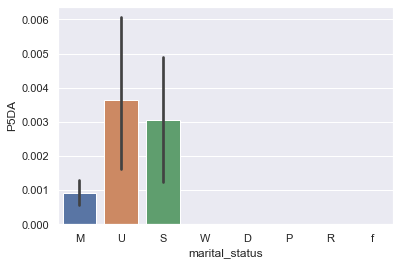

In [8]:
sns.barplot(x='marital_status',y='P5DA',data=df)

In [9]:
#construct a feature list to be used for recommendation
features = ['sex', 'marital_status', 'birth_year', 'occupation_code','occupation_category_code','branch_code','join_date']

In [10]:
def combined_features(row):
    return row['sex']+" "+row['marital_status']+" "+str(row['birth_year'])+" "+row['occupation_code']+" "+row['occupation_category_code']+" "+row['branch_code']+" "+str(row['join_date'])

In [11]:
for feature in features:
    df[feature] = df[feature].fillna('')
    
df['new_combined_features'] = df.apply(combined_features, axis=1)

In [12]:
df.head()

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,...,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3,new_combined_features
0,4WKQSBB,1/2/2019,F,M,1987,1X1H,2A7I,T4MS,0,0,...,0,0,1,0,0,0,0,0,0,F M 1987 2A7I T4MS 1X1H 1/2/2019
1,CP5S02H,1/6/2019,F,M,1981,UAOD,2A7I,T4MS,0,0,...,0,0,1,0,0,0,0,0,0,F M 1981 2A7I T4MS UAOD 1/6/2019
2,2YKDILJ,1/6/2013,M,U,1991,748L,QZYX,90QI,0,0,...,0,0,0,0,0,0,0,0,1,M U 1991 QZYX 90QI 748L 1/6/2013
3,2S9E81J,1/8/2019,M,M,1990,1X1H,BP09,56SI,0,0,...,0,0,1,0,0,0,0,0,0,M M 1990 BP09 56SI 1X1H 1/8/2019
4,BHDYVFT,1/8/2019,M,M,1990,748L,NO3L,T4MS,0,0,...,0,0,0,0,0,1,1,0,0,M M 1990 NO3L T4MS 748L 1/8/2019


In [13]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(df['new_combined_features']) 

In [14]:
df = df.reset_index()

In [15]:
df.head()

,index,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,...,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3,new_combined_features
0,0,4WKQSBB,1/2/2019,F,M,1987,1X1H,2A7I,T4MS,0,...,0,0,1,0,0,0,0,0,0,F M 1987 2A7I T4MS 1X1H 1/2/2019
1,1,CP5S02H,1/6/2019,F,M,1981,UAOD,2A7I,T4MS,0,...,0,0,1,0,0,0,0,0,0,F M 1981 2A7I T4MS UAOD 1/6/2019
2,2,2YKDILJ,1/6/2013,M,U,1991,748L,QZYX,90QI,0,...,0,0,0,0,0,0,0,0,1,M U 1991 QZYX 90QI 748L 1/6/2013
3,3,2S9E81J,1/8/2019,M,M,1990,1X1H,BP09,56SI,0,...,0,0,1,0,0,0,0,0,0,M M 1990 BP09 56SI 1X1H 1/8/2019
4,4,BHDYVFT,1/8/2019,M,M,1990,748L,NO3L,T4MS,0,...,0,0,0,0,0,1,1,0,0,M M 1990 NO3L T4MS 748L 1/8/2019


In [16]:
#helper function to get customer index from ID and id from index
# helper function
def get_ID_from_index(index):
    return df[df.index == index]["ID"].values[0]

def get_index_from_ID(ID):
    return df[df.ID == ID]["index"].values[0]


In [17]:
# Getting similar scores
similarity_scores = cosine_similarity(count_matrix) 

In [18]:
#make a recommendation with a user id
user_ID = '2S9E81J'
user_index = get_index_from_ID(user_ID)
similar_customer = list(enumerate(similarity_scores[user_index]))

In [19]:
## Step 7: Get a list of similar movies in descending order of similarity score
sorted_customer = sorted(similar_customer, key=lambda x:x[1], reverse=True)

In [32]:
sim_cus = []
for user_ind in sorted_customer:
    sim_cus.append(get_ID_from_index(user_ind[0]))
    print(get_ID_from_index(user_ind[0]))
    

2S9E81J
M4DZ6LM
BFFLEUE
7I2N20A
VFQLQCX
CRQD9I4
C1UU7C8
SLDPJT0
4N1M38J
RX29O00
ADBE2MT
PCBCHA6
5LKAZEW
345VSJR
A5E57A2
60377AO
X43JNM2
ZTQVRXA
KBK0BCA
L424RSI
T3ZUHV4
WV2YJSF
MRHUW3J
I0UIXVY
C1RJ0ZU
KG6V99F
JSV92I5
B1RNE2N
3Q7GY6U
RNJR6RS
F7SOZ73
4C9W3S8
5BMHBXF
GA5F10H
LB1GQ12
F2OOO7E
6YWTC5X
D5ELOGR
1M5T82Z
GK9PT01
JLSR1AQ
HSWN5D2
U26FBNA
2H1PZ5M
IEHU1YF
2ZHYVV4
R3P672K
P28R1GA
QVH6ENZ
70CGTPO
VPYB3U8
GCL2IPX
9J9AED4
H6NLUG2
6AIWEWN
LH27ECK
EXNCMBK
KR1CX1B
ENMOI26
MW4SO5B
M658FG2
FLGVFVK
VIIP3GO
ICICIWQ
0TKZCRI
CGR9E1S
ZFH8SVR
AVUA2P4
ZJJLK9Q
P28AIU8
L14YPRA
QPMJRW4
PMHJZUJ
YS148CE
738NBUS
RSLCSBX
0987I08
F6KYVMT
KAEFHP0
4F82BKP
YDY7WCD
NTJ6E5S
VMLPVQR
311G7K5
4RLR6I8
3TF3699
V16FPJD
3MEIDHH
NLXXIPO
1HYE4AT
RFME0VN
7DLPTR0
JA7HWBJ
21DO1HX
BUBA05G
KVSQYS8
16KBVBH
NUQK65C
2UQ8495
SYPCEIN
J0XSMYB
K4EGGKH
9CMMRXU
FH18GBV
QKORC1R
ZUKOEZU
P1G942I
RY72SAW
OC6J6FU
SW475G8
W57B9RQ
C9OUZ3C
QRJ7P3R
WJMUAWV
MIRPCE8
W8GLAXY
FOB3QMY
GXKYHEU
9HGL5ZH
MVL8M5H
I1JCUDW
EFV4UR1
NK1VI1Q
HLI0N5B
BG7S8FZ


TYP7OVX
1G5JE19
L0ISQW0
ZESQ4RY
WVQDITC
DFWCPKZ
G7ALH6Y
4JESV88
7G8GXEK
B9O68K8
4YKAFLW
DFM9FWQ
13EYHQS
19MLK0F
D74B748
CTLTOOR
L50HJ39
JKALRN3
0Q2OKCV
2A2SBTC
O5WWLLH
1AY1JC2
ZGX7XTW
4VMXJSV
JQFD0T4
SUKXKFC
44BZKSG
N4G4LGC
VVGIJ56
Z89JEEZ
2A3L0CQ
XVAWPIN
KVZXD0X
NPOCWMY
M86NY2A
EHUQ77R
4WMG1DD
H8XP2N5
6LXOE6H
R6EW1SA
HX5DT7C
HO2OGKX
Z6VISWO
YSWFGGS
S4C6TZL
D54CY9C
7U2NLHS
TPGEV5X
LDQ6SRO
53SCYFP
J0D5R65
KE5G6FS
JM2E0VS
NNUBTMX
8GIIILY
Z0N4Y2C
4K2SI09
APTMD8J
R9L4E0W
4Y2DW9E
9V2L89W
7XVVIZP
0BE6SDC
7T94LIQ
Z90BEQU
AGLH3KU
RX5K3EN
KVCJ462
KNMHPWR
UTNRPIH
88B9AY8
O3GEI5G
OQOY5F4
JDYOQET
5MRE0H7
J7HVJT9
WCHNMYH
QJOPYT5
MRE8KKX
3N9UTC9
FIPI9RE
P4D944S
Q6HW4Y0
SH1MIFN
WX1AEV6
XQ400JY
9MCUAPV
7NUO2AK
WIJUGLF
UG3TT57
EBXCIZ5
1A42FSV
2WP4AH2
UF19EDB
ZIFVCWX
QUBHXUE
E856R3B
5I470W5
OWV6G4J
DEKUU2I
Q4D551F
2CMSRQ0
A45RI4S
GN385EN
L4SGMG7
9X025PP
7GMD05R
I09ISGC
T6FNNFL
AXGTCX9
9W9KE5D
55N0B5L
RABZ5YQ
HYWX33E
5IKOXD3
HRQ2FTB
F2M3LFS
TKZDWC7
41XTU1V
7CQ0LGJ
WBR7L1C
NLRPX1J
8ZIFFFO
NHBSUW7
445OY1G


W57XNRL
DCIIICR
5B2W9W4
DEMM9PI
9SV2YAM
9BL1KBU
UMLGCMU
JLY3VNS
OC4OU6Z
82DAJ9E
4IP71PD
72DHG4F
FILV6QC
PNBP87L
EP8QB22
LGMKE6M
VPDHBAH
10JC148
OUHY6PH
TZPC8J5
W1ETZPP
GCXOILJ
HTEX3ZZ
U4BRPIZ
JF05GVU
2U4GPG1
TIA9PZQ
KMCINOF
6WN7G4U
4ANGJH0
TTWIPHD
EUUOXPV
6QF2624
ZM2CGMD
VZ0KHLR
KKA6L9H
R0FVGCI
JLYFY1F
7FDK9ZH
RBJ1QMO
UG4RW3O
FBSRK2R
367TNAB
A0YOE96
WQ8WAYU
2PSAATJ
PHS1L9W
U4FXQU4
3EIPAH7
WE9NDRH
JPG8UAB
QAK9D9N
X6CDJ0V
LD9O5N7
9WETLZ2
32R7OZE
8J7451T
KFCCQJG
4G1Q0RV
NZNPKZ3
IMV6VSR
RZZQR3E
B6ZZ28X
VDD7G52
2VNJ0T3
JH6AZ1X
R7ITLZY
B8SIW6V
QX4DYSF
R6TVJBA
8EC9QIN
8R3X27G
4U1H02Q
QJOOIFA
3EIO7OB
TCT4E9H
IF56WGP
198VGKU
OZJQ41K
5B9MR4M
JBUN7YE
VTM6KAN
LUYCEN9
7C7WYED
WRA33UC
8AAFXKO
O7NSSSK
ZS7EJJI
8BIJN1Q
VVU22ET
OVIDA6V
BIYF8TW
DEOD597
Z77V03B
K5VJNJE
052IUCO
KL1Q4E2
MGXTOLU
3T7PPZB
L9NII3D
X89FEIJ
WED98QP
XXEP1EF
0LPEPAF
CUCRWID
PCOULY7
BHKG0YK
55KCA0T
SQX150I
3OLFKVO
IQ34JJR
9VMHXSN
G4BQRYL
EV6TFFC
QZ438V0
NF9Y80L
RKKTPCJ
WQ5S1FX
493A0GR
AB8JK4S
RU54R73
WO7CTAR
DO80AGH
DWHP7H1
R6UMKHJ


P4S51AF
9RSXD9U
YLA5DHG
OJ3TKR7
OXDZJ9E
UG87FW1
3YG2ZN3
8Y0ROK3
3M6TOGO
J76ZLFU
TGVNDJW
J8Q0PFB
K6AK5RY
21UI0AZ
NISDXCF
1FMYBJY
QWRUJBA
XZWXJAT
FIHATTP
FLDJZ61
JSHDIJM
OOTUXMT
PC4CTL7
GL6DM92
L1TT1BB
LD3RM00
UMCW09T
LX4U7UN
4MN0QTS
GBFRAHD
IHP4SJU
SJQIZ67
1867OOH
ELTOZ5T
0YJGRQI
7OB8TIQ
AX7FV3S
6REWI2W
03PY3P7
7M98XWP
9CKP8JR
5X56GVS
5JXWR6J
9D7TG1Z
KAXHJ82
366G30D
CXQZ4IL
NZ0RKFL
VN6HA8P
DJM35MX
SH3KY77
OJEA9U2
GQDANNO
0XOU0HM
P0M98CC
OJALQIL
2FB9WA5
3KN6V9A
2JBVOOO
B0FUU5C
7WD9MWF
6WEMGOZ
ZWEHTP8
5LMX462
Y306YB5
IRWO7KM
VGUXZDQ
KS3VPIC
1PP93DA
S9I1G4G
TL6JYRU
UQJ8R82
XZGQDCF
419KGQ4
HZJIDLL
XORG7TW
AYSW973
E1ABL87
AKGRXD9
3IJA2E1
QHJ1MOW
E1ZEHQ0
UG1RQ7J
8NW8X5A
ZTSA1GW
AXVL7CI
8YJJFXK
2F01EPX
DO6V17P
VLNWJV3
KB8RO69
CKDMAX4
X407XF8
T1D1B71
IYQXKXX
ZTCSPS7
SY2PYD7
ECLPUIH
VH1G0Y0
9688K98
NHV6FIV
6XUVUUN
WD41975
LSWWYAM
Y0IZWP2
9ZM627Z
J5H2CMC
U0IS0OH
UWPMPCJ
KFHXW14
9RRVE48
OW6DKHB
M7LPSBT
FKN54RK
HZC0DSE
V8TPO8R
8JQI0L3
VA87FPC
JLI56OM
1P3KPT9
RITINT3
4PN2BDQ
BI7VTNW
WOUTRJJ
1FRYUJM


J5APE04
27K33XX
UWV9Z4Y
72X90WS
MBOIYH6
TSXU4H3
SQ8QVDU
M4GX9IT
QGCLV0L
NVSX5BE
YF3WAFI
9B9W1CW
XSLY9S2
XGKBQA0
26V4LEF
UMXD5IN
YGLCHAI
3GHCQIX
QZCSF6T
KLED8TC
LBIVSLU
C4IKKND
4GE0NLL
5MTP54T
9EL72KX
M012SB1
LNFAF6G
TMYZX1D
H4BSE76
W2JEZY2
J8A7V8R
DAEDL1J
W6HNFSH
26O56W5
YO4BWU5
ZJF66VR
T8G4OLB
JEJHKDL
I97RD7B
2AZ7XLM
AWANA00
IXJWVHM
O01X8KY
2VV2RGW
YS391MK
R1RRXJK
EZLR93K
TKYPIB3
ZFIKID5
QW6OS4T
4IKVB86
3619KS6
VIFRGWC
2FXCH83
EFRXHLZ
Z5MPZHB
N2JFN3B
Z5MD2T4
52CTK70
TZNWT2U
CKA6ORO
MJ9O20T
NP3BIMP
E04OEB8
PNM7Q0A
Y79BTGS
5A8JAE2
JFFXUVR
ICOWXLI
FD33UAV
24P67IQ
BP626VX
O70J3OH
3GR89N0
1B36OTR
G6BLO12
E0JNMS6
YSY0R5J
HGXOD7L
K1XUZ09
FOL6G05
OK4V38Y
YWR0HPY
I08FENT
NNYCOUL
U7IZJ60
TWSNLGF
JO74Y2V
ZSH4XB6
82SFNRT
56UC3RO
GRMDNDT
627FX93
22RW37V
EJ7KPEG
RF3FV2N
7BH2PUB
W0D0J4D
SMHXFMB
6TDSW9N
21C9Y59
ULTN9TE
CXGOXBK
QG9OIVA
3CVO05A
VHXBQJ5
MHFLN2E
7L2TJUO
4H9VQ0H
FLKBB1Q
9AC7DZ0
M9UP4XG
CULZZVL
5BMY0K9
0YBUV18
HP7FZYZ
67YCWQC
28T52Z8
HBI4HRF
F6TGTQ3
SG0QX2Z
AKRGXOI
NPBWKJY
MX1GODQ
VBKXVYK


UC8AF8M
01LM6NG
0SLG26Y
P4UM8DJ
IF7M2NT
EQEVEMJ
9CEWTP9
6ZVVPEK
3MHLBGK
YI0V2XC
8PID3W7
ZYJY6P4
9HT2W2B
0MN8T09
O4HLUNU
ZXVBXGA
VLFC8JU
BJQUFES
NW4649P
PQ7I1LC
FMEOB6Y
1LVC7HB
4MDBEJ2
7E3Z4EQ
494JFFN
RDAAYOV
TGEO4J6
JUESDTK
17US4K3
3NM7ADT
SLFQNFU
6LDWGHB
N8PF4S9
YAJW0VL
3W676VJ
DSA9R59
2UQMGCO
OOBKDPM
NPD18I1
8OJFMHW
AZWNTXT
DC8FGUG
AUR4PJR
BW2G6DU
LFJT332
WLRIN0K
WMBCOPN
1YDP6QY
PB6QMY1
ZEPN39R
KWUOIVT
417ROQZ
566WZPT
8B34UD3
ZCCT7KO
2OU9MY7
KEAFQXM
QIVJEUT
K85OG05
LLC36VP
ZSO4RB3
RN9GGRY
D15LWME
HPTYKP2
CPBCT5U
OJO8SHS
ETNSLVI
GPGKU44
UDP1SOO
VUYYG5N
EBTSJR3
H8L0I2C
DBH8A5V
0TXM1HZ
F1IW08B
5XDJ4BR
FPE5NDP
QI5IV20
VLXVI21
WRB1TP3
3KZWKF1
S05LHLL
F07MHG0
GSQR8U6
4R3NQKS
YW4E2Q7
7BWXLZT
PQW0B11
GSKV50B
QEK1YEL
AXIBL7A
MYBOP3Z
Z5SZ90M
PN6N8EX
G6P05VW
XW7EVES
6DF3LV4
BV921WX
QDXHFRZ
BW5GXZR
N24ZPVU
C6ZB6S6
RTUVH17
YR8NF5V
G1CJL0T
YXDL6W6
WPH7021
OZUNHDG
IS3HAGP
5M5XMAK
WHQVBGW
1V7I5RC
T2DNKEP
GIGLCJY
UK35I65
A2KFCI1
V3GJNM6
MUAT5XK
5C16D9G
PVU3F52
UGZL8Z4
G4MKUII
DDPCYAT
ASMBAZG
1F5UGI2


GO8CL5L
JD1K0EB
TN4JYVX
8Q0B52N
M357D43
KSGD3TS
O5TSN67
UG2JZKM
RI022GV
SWPCUMY
9FZT89S
NVK1155
I9QVAZ4
XZCNNA1
SU26LFP
S9XOB4H
MMRODMA
7V5C293
6K0ZD8K
V2BQERI
R32BK2X
1ZATZHV
Z3NVDTU
VXQKM72
RPIK8EO
GS4U0EU
DFWA708
6GI86LP
0DZSHAB
I4NIC9L
TTP3L68
4Z516DB
DAJLM0H
HWEBCWA
MM87VM8
68S4NOD
8X23J35
TMMGTDS
QRUC40U
ZH05YXJ
DPC08HM
2O5IF8Q
3XGOGUX
3I9CYXG
F24OSQZ
1FWNRXT
ICB1B0U
I8YVLS3
KGIE87R
AWU17HY
AV64GGF
N5CQ1UR
J1TWLPY
J51UCWX
WD8NZJJ
YE9EDRB
34IZS0W
O8MARM6
VDTPN31
RHMSMQA
FOBD4MJ
R5QI6ZT
OBNB8Q7
P3C1I3A
9N3Y3UH
15VW99R
A2O4UJY
I2YGQUX
7TZ2AO1
525XV5S
SQUC899
FAX8QZU
8BPOB3F
Q9M9PUI
26SXUXD
PC5NGMN
8TYWWYT
3UZE1P0
B98T6SS
HJM7NL6
38BDLO8
HQ76J6L
KOODZMO
CRXXNAH
60OKDC6
ZS77194
PSN4XFA
BPX0SDK
G61WV11
H7SRK0G
KN311F4
IOIK1E0
NEKL5RL
TSE2F9B
54W72W5
PJ0L5D9
N728I7Y
QLP4J4F
2PMSAKE
OP0340Q
E73JSSH
69J3S6P
4EFF2HH
GHE6U70
RB5HYVJ
91AGVDR
J4SV3FO
Q35FF6R
K62GR83
S47VPS5
294RN1Q
HIAMYKK
AZE6TI3
BCYR2I5
N1XZKU4
OOPGCQW
PFP481G
7RKNX9H
UJHRLQ0
QHB3QRQ
ZKONEYT
LXEGBFA
QE2SN03
T4EGU3M
ZBZ7IKZ


NPI9HFH
M7LR39X
VRXE2KZ
48RXJIT
CZNR8SC
3ZCFLV5
LRGSKZ4
4P1ES32
FPSYPQ6
NNEAD2V
I0BVTNR
KZLS5ZE
AFHEQLW
4CW41AW
V132BJS
3GIFZ96
RQSSL5J
VXU5LDU
MYN95M5
DMIZ2F5
OYIZ7KX
JI0NDJK
4238HLI
BH9VYSH
1SSPHXT
T1QMKWX
KW6WG97
QAVJISN
COAK35E
VYJL7IS
QWULXVF
26N2VPD
WTPPPJJ
0YIWC62
EBB741O
IC7Y86M
ZYXJ1JI
PA3BZ6G
H5L28JF
3FNV44P
ZIM0GGQ
4MNRTES
E7DBPLL
NB2BI6T
ONL3IUB
QE97YGJ
95YE431
H0LIGQE
F2M2N49
6PS4VCT
H5EGETX
NTF0ZWQ
Q8C8Z1Q
NK8HCWC
XU5XM8S
XOU6HQ6
DMK1X1X
L5BN1NX
RH7J8T7
W4Q1AQS
PDU71OB
G7JU0KO
LC3BTCH
KR0SXJY
F5C3MJW
DOJTTN6
BE84HSO
DIK4IPS
I8RE3E7
ZY08NJS
ZOAUBGN
QI1VUK6
9AUT2JT
R968QT5
U2D0PEJ
OYHX590
JOS7XZ0
0SS4ABB
OAZBM5I
TPGKW81
99EVMFQ
U9DBSX4
5MNPGKX
M2XODR1
PKKWNBF
2GSNSOQ
YMWU4RF
HMKQKVY
QWS2N7N
EMXWRTB
FY19XHJ
G6JHKEF
BDYEF1M
YVTXNVZ
6M5I86I
UFZCCCN
0GWE8OV
L3S7LV1
PTA34ZA
V8X3NGV
6LBPB74
1MMHN4L
S8MST2Y
MXB4Z5F
OI532KC
2L3505M
S1NRCUC
CTC06T7
VVMGK3H
3LLK7XY
FPFYG58
92MI57Y
7X51QD4
TP85QX3
PXOVGTZ
GA6Q9R7
9VKSRJ2
JHGJ5DJ
6BUCPJ4
3RQBYJD
49DT2YH
3G2Q6RW
I52CJ4U
L6M1NYR
MTVMSFQ


Q8PVHRS
Y6GW326
L8Q07AA
FDBDYUM
NL5KZ8Z
GRWBDY8
OMDKNNE
2LQHWGT
HF6GBDS
FHK9G7H
DOKBX3Y
KTEOS0Z
EN3BJ18
O00J0IQ
RKLAZ7L
UZBLDF5
XC5RKCC
PGLDDAJ
0ZAOV6A
1DPHQ9S
3NFS7QK
2D055KI
0DR9KXF
VOWPP7O
GN8O7DY
MJGJLKD
XS1GRYE
BNZV5LJ
X8Y7PZI
IZWJ03I
M99IAO1
1MZANI9
98WL6KT
UVN4X2O
AJWYUZL
CEIN2NI
W911JQZ
5ZXJG5R
TW75YMH
8PI02CQ
CK858VB
R5Q1X6D
JF8D5KZ
V964ZWO
0YJVCJZ
P6EOOXB
QEALOXT
9CYOCXI
MLLQBAG
AFRPQ0V
75LVNYF
0HXQ0C1
ZQVFOA0
JODGG0T
28BCO00
MAHJWK8
X10RAUK
F0SL24N
FBZZZB3
J7UD6NR
TH9YZKD
WB8Q05P
YGKV70Y
9Y4MVI9
MU8ZLXN
HW3M049
FAW80F3
8RJVZ5C
0FVSS9U
80RAX01
QQ4H6BO
TEW8DLI
IQLYOR0
YMW3WPF
E0O2EL0
LR5T1J0
MWT8AYG
VYOBD3Q
FSO9O39
S7GKC0P
0DHUWYJ
AYLW5CD
9MP8Z2E
1Z95476
MHAEI38
JI932G1
DJUF29W
RZ0NHAD
2TH7ZGH
GYCGIHG
RTPH7XX
EN5FIIQ
Y6TA3QL
Z3VRQK6
9EE8HWO
97VKLJG
2WF3SJ5
FVZAPC8
3RUIXL8
T9T1YGE
YYF81Z6
49SU58I
O4MXTOT
OEGLHFR
X9ZNLDN
VEOQNNB
VPTEDCT
FFC5NLM
WPJLN6P
HDQFGUE
0E3AYAH
ACYHQIS
19HKC3X
ZGRJBAA
QHM436P
KBP3JWQ
45LFJQG
W9PUC6H
WUL0Z27
HC8I6TM
W9ZRYFQ
72OLU1Q
DICWHG9
HIRCT77
DG6K0AP


MJOHQ4L
7N0U7MD
P2FTPOO
BLU8XZF
N6U0W6Z
NA0KNFQ
87O9JUJ
3DMLLAN
URMPGWG
0KHWI2C
64D3KNT
498YWON
FNOQ1MK
9ZXTW3P
J7O67RY
R1OLTKP
A5N94E7
OIU500U
RJOL8F2
JHBCWNU
PLH8PIP
LQKX6BA
RA7P4DG
N3KWACL
WV0XNGW
RF1BXZ7
0DGLQ85
Z9DMV1L
IXRNVQK
MKUFFCE
FDWN9LB
XTYRM2I
ZR0ZOXP
Y7VHYA1
J66TAT6
89X2RQC
6QWFPK0
PHQ7DNC
FKUQ2LF
DK1BPTA
ZKT22NB
YWQKCEW
515QI98
9RQUFSK
L0I29JU
751MMIC
CHQTC2U
L2BSC0K
F4YB9KZ
YJSDXB6
VOXJGV5
Q9N61G2
O1Y3JQ0
ZCGI6M0
LIZH65F
JZY8FTX
DMRV5NW
LKFG5CG
BFWQCIK
OXZLAUY
GVN5W29
JCT1A6D
B44GP76
RU0EAZJ
YS1UE4Q
OJWC523
WXEQN5G
DFDITFZ
378SVN1
B0YF5JU
HGW5R08
N5GN8GF
R64Z1B1
Y7CJ01W
HE6882J
BKYKVUD
2P3X9AK
SGGRZAY
LONSOIV
ZERZGQY
T82MMWB
4IG4BVT
GENJ518
826PGMP
AD4LR10
X0K31XN
0UEFLZL
0WYW9QP
I3PE0FC
NKCT3QT
AB6VYXX
9H7WDYH
VLIZNJE
S9HQG7K
4WBV89Z
0KK9FHI
1AYFVKE
Q8RJIOK
LFMOOMZ
VHJAH61
IIF4MBU
7RH3SXE
2GJXRTR
82JHEL3
Y18UD8L
J187S9L
279NLT2
44A38LE
VSYU4KK
5FWVA0H
CVZAD8P
Y90TRP5
S6M4SP9
E0OGPOO
1B5B721
O762LW1
HLKQVHI
7B7LWVV
7HGKO9S
FTRLXD4
HCP0FRA
D93A191
WWOVLY3
WSYG9DS
BXDPTIN


KH8RZ5T
E217CIP
I9QIGQY
B925PI6
2S7YMTB
3OS0NYA
DI59XCR
6KZM41K
VZAO4A5
CGHKJXD
SDVE3KU
QSAHYR4
KUGBL2H
1Y78KZR
2BWVY08
1ZS5SKM
KL0W5F3
KGOPVDH
93V8501
1SUH90V
NH3H4KC
1BA7O57
SXD4FUZ
TTL0NUA
WOSDZ9M
EM1JNW3
OT6G3G1
I7ZVRSO
5R5K1LQ
KKWT1SF
F807N6Z
OIQJVE8
6EZQPMQ
SHC11EP
BA2CB79
VIU4P9F
D109P0O
IHM5CWM
T28WQ65
GJOC5AZ
A10O5OJ
83MO33L
MI1IK4A
1JZAE77
ULJ857C
S3T9RNX
JW8H6DM
ND7R01W
44FP8CZ
JUNORLM
P9B2VSA
RH654AI
7NC0WMS
W4TI77V
60F12QM
7JM2J82
J8MEEVA
IIHHZ5W
TWTOX56
8QS9I7J
YD9JYTL
UW2ZO61
9ADMHTI
KFLPFJ9
WIWBKBY
KPM75CI
YRSPH9X
T8L6LJD
78MKXWK
6E1VR90
UJIQMFV
96MV44Y
H0AWY3I
VY15NMY
Y9RVGPM
LX6NWRT
2PR4TWN
KL9EX7K
W9DUXZK
52XK52I
Y7F9FS8
IETZVMA
EFCFTDR
BSENJS3
1WDM876
6470R82
ILRSIOF
FTGAL2X
6CGFOPD
NMMOXAH
RTMCYSP
8YIJ4Y5
4TAADO6
YLYU1S2
AH9TRZW
K4MS9VF
VQMJV8F
EQ4PZ8D
2EBKWVV
KXA9S4O
D1FOUWW
GARE2D7
JHEMPTM
U8FJ7P7
ARHC1LP
14LTTF8
9NJB9ZE
E2M7J0Z
EYCX65O
VQMBVDL
U4MT2VW
ADS1PWS
9XD64K0
IMJWTE6
R4B2E78
AWY977E
R0J2IXA
2CFPB9E
ZH3CGAK
T1083RC
XWK22Z9
DLIBO80
SZXBNSJ
QH9ZHX0
LXR8NDC


N2CHFKI
18FC7PV
MDVX78H
CZ482TN
8C9TBDN
MBBK7VD
DGIA1XV
J13SGNQ
Z2U7PCN
15Z3XZN
KTSLZKD
FA86XX2
RDZ417S
FUPBUJC
94J9VV4
C5R3J7Z
NE49J97
BCHQ7U9
W0EDTR7
HAU7U0Z
0MWAN2E
JRXS5RB
ESRX1DY
C0I7HNI
RSTST2O
Y0E0ZPL
DVX23XM
H5WUKYS
T4ARK7I
XYH97TX
UH2LEJW
ZCBCUVF
D2TUQQI
2WSCNRT
U8CUN53
HIUPCZM
ZJYM492
E8D0512
7XID9P6
XQVWB70
YZLA8JP
8ERPDSU
0898U7J
GPX8VEL
Z0HQ5BU
U9SSKO5
E1166J2
QFOUTJ9
SF1BB9D
65FCBKX
DIS9URZ
9DRVZ9I
RH02C03
1IRC9BB
53AJJ5E
4DROGCD
X01WFD2
DM0WH2Y
ERQURFX
91Z6T19
Y38BSIG
BHK2CGL
8I9CG2M
G7IHLV4
PYA3980
PMZK0ZQ
8NOTVW2
IQQHRK5
BZMH474
R14CGTO
GRNOFX0
AYP1K9Q
DP3CTM9
PDSJ29S
QQKQW0E
S7VJN37
H23CYYE
EL813L2
FTYY3RX
VC2MRE8
IRCIH1Y
VOUFZC5
8BEPCXE
LJDQCA5
QR1XMHK
WALRURP
Z64XI07
R4OIMBP
WVE01XZ
EWSGOJO
QX4TVKB
HI2IDBM
U30P9JA
90ESJD0
0C86N76
Y9ZEHAX
DBK3BV9
5E987HW
M6PCR3Y
9VFM96X
FKRZ27X
V6CYBHB
AU0WPZ0
U0YJOP0
ORU29X6
I4K04OH
8BOI2E7
IEFADXY
OKZ09UF
6BXQTYS
9XI07MV
FE0Y3C2
MURHB9S
6RJ41Q9
9N78AGM
5995O28
HEPNZEE
Z93WM8M
50K8TG9
85A9UTO
QRNBRS4
GZLZ6FB
GXR7SAW
K2ZRKW1
Q78EP87


HD9WB43
6LGEDSF
Q0T5K0F
8F5BQ08
QTALTNF
8MI4LOA
RRG8ZJ2
0U9ZVEN
FV2KCII
AY00O5E
X0POS19
UWMLN87
6CTXOXE
PUQ5U0M
D884XA9
W1036OT
9OUQX1M
49Q3BBC
BXT77PW
HV6MA4O
WQ21J4L
WUBBFU9
QDP3ZMY
9XN2IWX
UDRE0VU
UBG87O5
0DS388J
4UK0MXP
L0XSE9S
JYR5FQI
WRFXPZ8
OOHCUOY
VCEF13J
IWUKTCO
56RZGNA
Q5M814T
YPKTIYW
HCRDIY1
RBDD2JG
9D3A9F9
8HWVYMF
EY71DN6
MYJPRH6
4IPXJKJ
EZ34FOT
9KLJ2P7
YIVOXLZ
FTY2SC9
GYYZ27X
JU0B7O4
VYNAD5Z
OLZST29
TE75A8R
3LBAGB2
I7S9RLQ
6ZY6PRI
XFP40T7
RKA1CUB
4NFAULT
2S34MHF
IJKNH1Y
EY6UV6O
RW3MKPS
TV3MINA
N2TXB9Q
60U7DID
QK65BZL
3XTTYU8
GK1JMBC
DD02TK2
MXFLSA1
U7VI48A
4D03WQJ
P74A0GJ
ZB6JVUD
O18YXTU
3XBIOHU
U7UODYD
511DX27
ZAMFTEH
H8948EL
MSJTOFD
EIW1MBD
BATEXW7
O9SN6QQ
H3KE662
AL114F2
CTKXJZP
QSJVKPK
HXHEJHL
S3V93HI
3YMTPDH
2HRZCFH
SRU5CML
KHVMAII
XMXQ96A
E3HU5KK
0J90EVK
JFTQBRH
5S4EX4R
P8I8RFE
ZGHMUDW
PSD3EXH
VBWUPBJ
F6ZC72T
60BQ2BF
AHNS5S6
80OI1QK
NY15O26
TMZKP2U
UBWK5OG
LH58IN7
VKZ08IE
JZA5W4F
SKA7AB0
ZSK3B9Z
QAP1V5K
6OM2BD7
13NAR7I
5XLLRGQ
SVBORFQ
M488ZTV
I1CGJU0
R4X90AY
TMGDP2L


6E0SKTW
AH0IJ42
Q2LSNFO
MGLXCQX
AZFC1WP
FBUUIVS
K9WTVZO
G69WXQW
CPGGPIN
ACPSVRY
ZL1AZCK
KEPLAG4
FEABQRK
HSFYPT2
TX4Z3M3
1CKE54D
1M5EZCJ
920ZFLT
Y3A2L22
E7WHNUB
DE0NCOT
6HYV0WD
6REAJXA
CFZ24LS
5HACBQL
CGWZY0L
PJ9C3HY
0S4EDIK
RM9JUUZ
E99UXW2
9KJ5LES
5L1FMKO
KDNIY1E
JW8T4EM
D74E6GF
CX722ZD
PJTSTQU
RXZKXYG
AE06IVS
GA98PQ8
JZKPO4T
CQ82V7B
X2NFZRK
T4C11X0
A6GLDOS
QNGEFJH
D4RK29L
I2ND5NT
1G6T6HL
26QOTCA
7FHFDVY
TSIMM1F
T2PQ1PG
4JKZIH9
3CTU3NP
6TT5LOP
R5UBT60
80CFMK8
L7H0AJS
GDPFV7P
23QYH0W
WVK4M93
WAQEK7C
KGX9QNW
EWI0TG7
RS5S1OH
SNHY96U
JIBXXKQ
R4QJYTR
TFHFJ0H
NWBGLIM
H3JCUUF
CXSZVOZ
RXXYUA5
F6V71XZ
1KM6SKP
ILXTEI2
0T6066A
O9QMPWO
WR7NMM0
26YOJMA
OYJ3WWT
X245E8D
H9W54AC
WWEHFQT
298WTFA
JMYVJ89
KUNR3B5
QC5MH00
18EPA9H
XSGUGGT
NUXHJLB
E5HJAP7
QT3XBUK
YWH3G52
ILCWK04
4F3Y7RQ
7UZDEJO
QUFOX47
BI0ZZE4
K5G5P3R
KGWB6JS
G1QA1G0
TPC5WB6
FYO11BH
I0076ZM
VFY5TON
EB2765V
WFA5S3P
Q0K2SCT
WWYNMWV
N659CEL
7VQREGY
9WPGMF6
ZGY172S
BKBNWK4
QTFE80G
L6MC7Z4
B3XK3WS
JUW0BB2
V3Q43W1
Z0FCP7R
TGPRK0Q
O2LVQJ2
6ZZK5WF


X6XEY5R
191UV6W
YWCQO6Y
K02ESIT
LHGB8LL
P39QWII
9QP2O6E
SD5HZTU
42WSA0L
1UA4VAN
OWD2E55
PLVCV52
0D6P12Y
51CG52P
48098TJ
8DW1FSE
QD5JSVM
CVZLZAM
LPT9VF1
VQ2KI68
M1LIA3G
1R4WAXB
V0LMYA0
MEAJNDP
Q5C223L
6W6B4YB
OU4SJOL
8ZE3X3Q
722FGBK
RJHXI5T
N0ICBE7
JJXZLLZ
14QU3NZ
2JSP022
IDL44KV
SFB0HSF
CM3732Y
MAE14WK
2QFI37S
HW2T46L
9RAB1YZ
M680FUR
5T5PGVB
OMR8MEX
XC0H4EJ
ETU58VL
JLQX73J
K9IVBZD
PMH6GE6
0STCPJX
EF6VU6C
RUMVE1I
VQDU9Y6
NF7RQTY
74PWMXF
LSFRWGT
9NI58XF
SF19Z5O
65X81DA
A5JXMLB
E4XEARS
P4NUOTE
4J2HHGI
WH806MS
XU6OCBM
E53ERW0
5OYHUAB
MC8MHSB
XQFU1Q4
9YOKO1E
UWKWOL4
A5S6778
E8X2CMS
S3UIQ9A
Y01VA8H
96B8NN1
78AK466
K4FNJBX
0UDTYGY
0JBX6M1
OR76ZBH
X723UEM
JEJNHOD
P36J581
DTOZM7P
HK3J9E4
4J87X7L
O2QQ9OX
9PSS6CD
82Z8VH1
W8IVZOF
MD13N1U
2XSQYS1
WI9P5FJ
8IU7FQO
W378RRJ
S2SBR45
3QYRFI1
HBIGET7
3NHTBTV
FQKHMWM
HNO37ZU
5VBNWNN
BANHI4R
RA8ABGH
YHDYR03
ZRB0Y3E
L835Y7W
RFUB17X
CWEZJTA
5M45IYW
24VBNQC
FS4XDOS
JLS138Y
1HNFE7J
47TUN06
H4V78B6
HKENVAQ
EZIS3CF
TE2KBQQ
A4YV8JT
VYH97X3
ZBQIBNJ
FT681XE
S47UIC6


XJ5P8D6
3QKVPX9
EZID830
7WDJ7Q0
PSFNONR
BVKQFVW
774CPGH
FR01QN8
EJP7S29
B3V62BP
FKZL0KW
BI0KMGR
A0JJSYQ
V0MLM8K
ON6AVA6
QJM1K38
MYLZHLN
YZA24DC
6IUL6DM
HZJESNN
OU15V90
0F5GHW5
3FKTAS4
IKGEYP1
6AUPSAU
WXYY0DA
BL5LLA5
1FUI2C4
K0T6QT3
M7NECQD
PMYIZT0
VJ1K7X0
TSDP3TP
L11A8EQ
5B9NJ8J
QJLK14F
8CG35VU
W845J89
IZMYKTF
5CU96AM
F5BU9QT
C0UCAEZ
7KQCZFL
ONTZ6B6
L14V02D
CVFTDZV
43ZF12K
7R8CPJN
RM70WOL
RLMA6U3
CYIV8NY
M8XLS57
DCU76CJ
DU3JGRA
Q50COFR
PNYCLCP
857IBW8
4BQDPPV
291CCLT
DGZ2NA5
NGA6GTE
JHWVSXA
WJ6SG4S
U5DCWHJ
R8NZVLQ
9SPWANC
7RP2O8M
W2NRT4L
J6H8ZW7
JCCRX4K
0QUPNW4
0RHAWFC
YBX1M0F
HEPP8X0
U7D119U
63YSNMS
ZT6VGJW
LI34EEO
P7XBCYF
WUZTLX4
EBAJY36
EMYSEH2
DF5XTPC
K9N0EV7
BHOY27V
CJN1KPU
PHQ58UQ
9NL1675
BSJCKA8
71GGRUA
M0R3GO5
G34PE8C
APY7LYV
ZSR8N10
LNV3QVK
9MC9WUI
1NDB2NV
47YCF5C
Q7O8TRE
89D62LS
MDNRI2P
Y5EG7OD
C0RUPM3
LAN48P4
2V5HXQO
QWQ49BX
4I97LSD
3KV69TQ
FCT8LG3
UG8Z972
JVP28G6
ASPJQWN
NTXTU30
LH7HV2M
5QV1429
GW4ZJCT
RH7MQPO
GHQM3F4
69GJVO9
GQW40NE
UJJ3ROZ
QN9DTN5
FYECURW
DWFFGHF
6IRK655


Q2MN5TH
3N03755
0Y6IWCF
LFLPUTG
GZ9VDAL
HCRZBND
RZ14CM0
3ZSKJQW
ITHST7K
3G9RY5J
OSD24YA
GT19LVK
VA921ZN
7UH9I7Y
AOSQ5J1
GC1CXHJ
648ZGBT
UTST32W
C9SVUTM
88WV44C
DXN345F
37GK1J9
0QVQIHZ
6IJVBRV
2G43X6K
UIJJ27C
5O1A0Y3
ORGZZNN
XETELTS
VFD0FPP
8GTSM08
H88VH7X
00NIW4I
PBF9LG1
YOOPCEK
4HL5OWB
9AT6JIP
9OD8TBL
ZZO8LTD
XJR6FLL
TC845G9
LNRX0LG
NTFLQ99
KZJLWU4
0GQ35WE
GN63AB3
W7BD3WA
BHLC3GE
POXJL5O
D3GRMO0
HFCE6PZ
1H1QUWL
8ER7LRJ
DDNOY4I
0652DXK
8FZLP2E
Y2JODKD
LDMAX6F
AG68GPI
CAW4ZTN
XF8MWCC
QFAOGB8
Q7C42BE
AJDGXT7
LYXFU8O
9IAGOHM
DALGBUH
Q48I70Z
NW79JA6
DY2K31Z
19RDBV3
OAI7YIR
AFHQOQP
7CVUO5T
U6YCH7V
K84VOSP
1JYEJ0O
UNWKBD5
CAZ12KE
16TAWOY
F9SR09A
9OGECV8
5U0IS8R
TXNU7LA
LMKM5LE
1ALLXMU
5KSC8AI
XIBZF4X
I5CSP7B
X7Y8U69
2XOHCQU
SNC2NT1
748ETTP
OFD604B
GFEQZ46
B0LV9BW
ASAE309
MV6YEXM
CYHLGAT
CUG9I39
66F6H1K
REKU8NO
PVDAN2N
S31EII1
JGTXWMH
8H6DBNK
S34EBGY
5C1TWVD
RHVBQYV
67PTJKM
6KTP0H8
XMNPV5O
24XECRG
5IUO1R5
RPEC8KR
DXXRK0I
Z5V99LM
IYNJNI6
J4OTT3I
7XA4Y5D
TA3BW4V
ACK91AN
OWRH0OF
B5WKTR3
MRG8SEA


CVF041R
PI7XDR3
0Z1V73V
1UORC97
TNIB5LW
7ZYTWOB
BK24GWF
NBD94VF
YQBP55E
2DARHC8
9GWRVY3
AAE99GW
CWOO2IG
I0GRUH7
NKRCJQY
560ZF8R
B1IM5DV
XW2RVE4
VP0A0XL
MBRRMPA
NCTJQNU
BTLHHRE
5QMEN3L
Y33Q35F
ICFB47L
4W5YV5X
F0S4RG0
70BPO1M
4WEDVST
UXZ79QV
ZDA8A59
3W2OFGM
XXX91MF
YN43J2T
B5ZGXS1
BDQMDZU
DKG1081
Q9S0P5Z
NIT9P1C
PVU65WV
58AZI5L
ZQ24S2M
HX644VF
L3GGP74
8WUC3US
X2ACL6V
FQ55XKB
75YC5HD
7A1QMMD
1699LFM
FZINN00
O5RG1GJ
F891TEX
Q3OU4LB
RIJQIP1
G6DE66V
OL194IA
MJJPZI8
24TATE4
R416BEJ
TKCD4J1
DPNCBYA
FFKW46W
I4ZQLYV
01RAY0X
3PNNPZA
3T8SLAU
0BDTE51
63YKPUR
48W8PEJ
TGT5OZG
QC2BAGG
9EGDEN0
QTIEM6N
FCF50OV
BVRSW97
3CXRJLH
3L41HQC
ZG8AQHC
D9QSTUQ
V5QEC9K
W7IQ9H1
ENCB485
KSWLA2G
5K65RDS
W57JB2K
BW3XLJM
U8B6HC9
VOQWXIA
6JT5IK2
3IY51CZ
1L12SCV
B6T1Q3G
CGM8BD9
BZZEZ94
5QLQXJV
77AURFM
XHKIDJ3
ZJNZ67P
O5U4KMB
Z2ICQP4
85XQHPI
8NV9BRD
XQ5P2FX
4XQGZ7R
QW2W1DS
6T2PCY0
HB1RLES
L9R4C0L
HKX3YR8
SIS5ZZJ
DAWH7ZQ
SW76X68
LKWQQ9L
IU6W9ML
S46VL7R
8T44IG1
C8OQRHW
60Z5334
4BGLOJV
PP2IKPX
MDPGEBE
LMHKMYY
79HW73W
ZP5LTHC


7C7SLIC
YM4U56L
7ABN0NG
XTR20KZ
Y27HLDT
WB0LBJK
993H7AM
YU4WA9O
GECSGIJ
YC7O5HO
Y0ODNJH
TTVKRLJ
N9PX7OY
Q9XIW1P
R8C7NSV
ZWXQHTI
VUTI3OA
2Z6UZ6C
HCHK5FY
T6KX7OP
29JYPQ8
POHGUVW
X26ZGWN
17KPRFB
AAASE2I
9RF812Q
R2CWIN1
LEDWYMY
ZVJ0AGX
GN9N8LQ
0W0UJW9
3W3TQ9A
OZ1PQ9M
D3S3LZH
EM2FVV9
VOMPMXG
X7GD572
1J88IJL
7QRCGSI
WA3PDVK
0EPTRI1
FLT3XDA
CHJEXL5
VVJLJ3B
IWN6C6H
Q3BXS0D
716RTI7
46EXXL4
WWGZRMK
ZW8OBQZ
LM1O3LN
JLUHSSJ
NQFUOH9
SWFIAX9
75TWLDD
OY79BXD
KN4S8IH
OTX5RC5
08TTQT0
ARKNX9B
IT7GCKW
W7IBV6S
4HDM8KH
SC1W0PJ
KO1IGF4
NAERCIQ
V8KZUPL
4UNPIXY
7L37O47
JD87291
8C1VHJP
NR014XN
2JJMGHK
MQXVWH4
VCNFJ8R
64IB2NX
S7L106O
84V4F2B
KAWKIH9
UCNO1OA
VH2FM6F
H8TETSG
0HMO0R3
FUDVOCA
98DA7SN
SILOAH4
2AZXKWZ
TTZI43N
WRS40EC
82UUPYF
QOYZ31P
JE2V3RO
N7WTLMM
GDN8QM0
AJGHGVV
O7OOGAP
HIIS1C4
9G72BFM
44Q46WB
8U8X4AJ
7HN2C31
9SWNRRX
FOF5K65
2OBPT2Y
C47A4S5
F4RIQGT
YN9AEEQ
04NH6X3
6X99I2I
K9WJCQY
Q6ID53M
8HRXDDE
2QLHXAN
EXWHHMJ
GQNRBN4
54EFVON
6P864DJ
P7J8SFJ
XJ2B6TT
N2TLQET
66EMX29
0VHPQDV
VVHDGL5
UBCICQU
IX1OF3J


A5UTZNW
DKSSMIP
X0SSTOY
IWFQF34
YI0VWCE
JGC3XJC
ZMCCXED
Y69XNZZ
05ELFH6
7MF1V89
OXOVFU7
NBS7107
OCULK7H
P386VPM
N0U8624
1YIOHF9
MRJXIZ3
AGL9ZGA
VCIFZLD
Y8YEFA8
4NHWLJ6
S5U0G0L
MOIL20O
MNM3ML2
RTS2DW9
H6MP5DM
FL35YET
78GHP39
TQIJ7T9
PK0YCKI
7AWTK85
116F1AC
TVKF0BG
21DYIZP
F3REQPL
7N1ZE3H
3BACXHX
FV3UC1P
ACKYIWI
GZDNHNE
JNGN05G
N95GLSN
JBV2DUJ
2CKOYDP
4JKTSWT
EBGWKYQ
ZRNF2WG
M4J10HN
0P1S6J4
P8FLNHK
WKT81MV
ZTT92S1
8IUZAF5
IMTDMLX
5GW486K
4EXX08D
RM0WTBU
6T6HY98
XFIC8VU
5CDQ3ZS
9W5PK2S
JGDMRDO
LP5QA4H
EDEORL3
C59D60V
IDETVOC
8U0JVRD
OAZ2BIQ
ZYZQTPY
SHIZS56
WT9XZOJ
LMVTL1S
RLBJOBE
WS1XNH5
OTFGMNX
IM04Q2Z
ZFBAYL7
OIR9I6O
JSHANJJ
DNDRTFW
NAHX5VM
557DROA
1IY6U54
Q9R7A5O
J2W0A13
6K2DXL9
ZMD1XC5
935H7S9
TQ18ERM
DFLS400
FCB8Y3Y
4RQAHY9
0OAMLYJ
QCOVVLZ
VF71GYH
JKR54XU
H2L683R
Q3BZHFT
2TG7RQY
6HT98FO
GSNB89N
HG078TS
NPJL7EU
V6NDOVT
1T7MEJ5
BA7991C
PW7CK1Y
Z3VK36C
EDQI9XH
TY3MCL3
PRA5RH3
EXLF65K
L6IOY19
SHNOQPT
RAKX36Z
0441DDR
A2SQIYH
SETUK3L
28FMFX8
MS85U2T
Y24M0EG
U1K8BJ6
0UQGP2P
IOF2U1B
XKE436V


MEBTWXH
U33RG9A
IW2D2J9
BKKSPW4
LUP8BI4
P41AD6Z
PLUHGK6
BLXQ9K1
R5O68C6
0BX01E7
N6DNJ1D
00YOYW0
93S485E
5E456HH
TQ56GCY
T9DJY9X
8QD1WYH
9B2GO7A
5Z7K155
RJMSHYQ
0D7RKUC
0QHBVKS
7UJYJ06
KSA0G7I
MJ0S7AQ
TVRN0SM
80TTXJ2
UK8CZ2M
6KVXFGF
BSIOZCM
BOYM7DA
CT0EN4C
X4EYV5D
NC8ONQ0
1AMTMAK
58FON02
BR7BF5Y
0O16XHR
825MH4O
0I83W0N
645SGRC
OZTGJQQ
10QKNIG
CK061EI
W1M9XUX
F6SKTCA
XDSYRH9
Y2AL0TR
Q7KV4L4
3OFXEFJ
4E463ZZ
GG5YX18
CIW2CUF
Y46FD2Z
R1F6DBZ
AEU10ZO
LN0C7FH
GKH773Y
L6Y3IMZ
I2MJFYK
X0SIPXY
EGCFEYE
CO05TUF
Q8LQAOX
KLJMIHY
FDJK6JJ
1GB6U9U
KEDMQGR
QHB4R4D
NKQRTEE
6OC2XE6
Y75E6EZ
3KZ4Z2M
GKVMCIQ
KRHGJIK
BQ3AUJ5
QQV9BN6
6ODFULI
7DCCF1R
F4O7Y7H
B6ZY03Y
UMI3KDL
9O78GMF
YDBH2KA
IFHVZGL
YLXRO9F
0ZGTKM6
VCJQN3N
G1N2B51
2O9RXN9
XO2CYBG
80PACCC
UJF9D5U
96OND7K
VEB1A2L
O5N20EF
LF2PMT5
W1WRYLV
31PLB90
B4TG6BB
ZMTOQ1M
87J1IQC
0B3VXQX
67YBJZF
68Y0QEV
VG9LK51
HGDHR00
SZA1P8D
EIL7LDZ
TAWFJZ3
7LX4F59
RWYYJAE
WA9U1ZY
YNSKSFZ
VFVUEDY
3MYPTQL
2J52HEF
IU4U8GJ
R65CKMM
NROHS24
J8QAO2E
RZAXG50
BEJVSJ6
TCBG0PL
S6KQ3LL


4SNTI0I
NVKNGWF
AURH6YU
EW3PO5G
KIYLCMZ
RAD5LUC
009IFOE
PVFHJTU
FODPMH4
EG36OE2
8QSSVWW
R9MCOJQ
TIVX01Y
J5RHSIM
5GMPU30
BX7XM2N
E0AZJAI
J2Q697P
KYUSDEP
WM7RCMJ
XQ28Z18
6XD1MI8
B1WJTCI
AS50W2X
U1E8MF2
D5VPCAO
38MQTAK
V6AGJEA
R22P4DF
8JPYX01
YXYZYMB
6UKU4SB
O97ES82
TFDNMUQ
MA2MR06
YHGPN51
C7TZED1
NC6V4HB
VJ62HTH
VB87YXE
YONRVEA
6WHSZ1P
OEL0TW1
BQZ2AB9
XICH4KN
DO8HTUR
BNGC3FT
IAVE0TC
46C3VZ7
9RM9F8G
2DKXSAA
86JX5MP
35SUSCB
9RUG0DS
XLZLK4R
OEUI034
9ZG4SNV
0VEY26H
4QV37SC
0XLUIBY
M9BBGQE
I4BFIHS
FQS37PW
K7GXFHH
FRGH73L
GRVPFNI
1XWJ9UX
KN09AFI
EJPXZUJ
WCUYS20
ZHFNLCC
BLIA4L4
IARJ8A5
X96835E
5WOGA8F
BNDCU64
1EJIXCV
6I15QP1
86OFWF9
3WR4DWC
EDI7S54
O3MC2II
ZICJQXW
IXULTHQ
ERGD28I
PDSOTPE
LC4ZL36
0GVFQZN
8IOZZB8
NS9WWDJ
91XCEM1
UKW5TES
6FP0CS5
SG91QOU
KDC6WC7
EA7A5VC
TKENYTH
GYFS3AP
0R9KC5D
PRF11XW
H0I9AH9
99IT6G2
VRGQ61I
4YJQUY8
08WGI7K
U222NUX
49B8JB0
GN0OU2M
JLF92CL
HILPCWZ
9DHL0C9
I91Z4M4
Z8L00CB
AWUEFE4
6CAS16R
FX2T38O
AKPWI3Y
N8PWFVF
SROEP1S
MOM4D9D
87FVLW2
CPVEH01
MO0EF57
DSX82RQ
AQDIAZX


86AYEFB
YCIV694
ONP0LJS
Q33YHWD
KMCBMV5
1M38N65
OV43B5B
K62X80W
XSSLN7S
4SJL3DU
EKVHC8X
7BNKHXC
EXKKFEJ
UEY5GE3
2TXFY8A
5WGZFU7
HK3V0FO
8CTDT44
CILRDO7
9LWB1WI
QOFDAHA
XDWHLK5
8BZIWR4
EAV2GUA
HWBK4B4
ZPPWNBN
QHNBVIO
HENC4ND
BSHMVP6
DQQ83M3
ZKXCGOV
CGK8WW9
USLZI6H
UZRWY4V
R820HGC
VIYRFQ8
OGIGYUT
18ZXENG
FSGBVEJ
SXUMQP8
PSLL4T5
DLRFXOB
5GNI0RM
XEDZVD8
U6QQTHG
GFZ94JW
X2CQEP0
0X7G520
DZ20DU2
CFPB10T
P714NXB
XZVAOZK
UOT9REN
A0YD48O
77CJHR5
9RFYSR3
DKZW9S8
HUXCC5P
JWB8XBB
LP1T40T
TAJUXMX
6ORBJ7W
P9V1CRC
OJHJ7FH
U4NFY8S
OYTUMFB
6AZMYJP
GYBDZQS
UKBQ2Y1
72ZBSN3
XDF0LWL
4NNTXM8
4R86QSJ
J33QD6Q
NRUJ5QI
3O0HWRY
4ESG2MZ
OQ83E1D
M4QW0PR
QPWN1RD
8Q0XTWV
WOUNLCY
B1C6Q0I
2AUJ1AW
WX8BF71
PB5LRZL
Z084GXW
RS5XIKD
VHPNMBG
AYOCXTY
PA8029P
LV7G9CP
53BFJ5H
DCHANQE
IN4TOAR
R59S2XU
1VBHS82
A0T66HI
OL8BF3I
JV8CKMH
BZJP3XG
1GBY7L9
ZJECXHB
H462OUU
Z2TK7HX
17Q4JSE
W13C5EP
053XFPB
AJEGAYN
M9OBXTE
73J4SB4
ROBHBMQ
I395MH0
4N9LT2D
E4NVO62
73I4C7P
B51469T
A2CR7L9
WA0KST9
72AAWYG
63N7AQ5
EM1VMR2
KN55HTF
GTGXDI5
SLAA6KL


KQSFP36
MWDLVET
N465OT0
LHR30C9
QZRAUOS
K09K3XR
EB8FDOJ
ZLBRX63
6QYDM9H
417T6II
L85025H
5ZYTTOM
PDB3EUJ
2AAER42
MNQXPRE
6GAJVA2
KIE4FV4
BTKF4Z1
4M1I80D
YNTDID6
5NBPJX4
F4VMWFR
4DP1GAB
QLBC9N9
9IA68OT
N7WAK57
0Q7D3HU
08BAUFB
XIGDIWK
UVKWUTN
ERBA2HA
M18YB2I
DZ5CUL3
0XX132F
1Y197Z8
6YKQM8O
QCRZAF2
85YYII0
QZGX5O4
AVBRLX8
LW4PG7K
ZRTAAWU
PYV9GZW
SBRXACJ
7WVPU0I
USMWZEE
KTE7MVS
OK5AY42
1EBQ3UB
XVBXN8D
842US0V
3SQEE6N
Q6DCEGO
1OQKMEE
RVBM5J6
YIMGA90
WEH2CQZ
0P2VA7Q
L8YGP4I
77EO8R5
8ALZ75Y
AZYDBOS
GVVYG1D
8YB305E
REZNG1S
39X8WT9
HWFTF99
CLNJVI3
DLMGY18
QWRKLUQ
0C66VO3
WST6I80
QLQI89O
T9HD5LE
Z1NM986
DYM7C71
9XN943S
M320BLJ
1WN8G55
YNX5SYA
EOSPTCV
QAO9EIS
V42HM9X
DBH647U
1HJSXHJ
DGRMD4A
1NCQK77
607TDHC
E4F7GVQ
8MK4YW9
Z141FLR
7PZY2HE
AY7XV2B
CRUIBDX
ZAUX61J
NDLROPO
OU024QU
G330P7Q
KTLB41H
0SZ643D
5O8V5K1
7TVY33J
2M8VKBA
59E35SQ
PDNW82B
SX45A1P
JUGRONJ
XVGDVJE
VKYU27O
LC37GIW
OH1AVNI
HQPL323
ZZHPUM6
MJ1F576
NKF6SXV
9O9I6JD
SAPB2BK
0O0SNNS
8FJ8TFI
CV72UP9
PWBZCWP
G0JWHYU
QZFEQGO
QH84XPE
6Q7ZDOA


Y7D343V
7FSVNR8
NDCMSJC
AV93EKA
PZQY9SK
6A2HOCS
D4HBXZ4
W47BTK4
J7IVPLD
H27IDQQ
98QPBUS
BOP0SV6
RQ6BEM6
3Z2QDVW
YYAOS9O
90YTPSL
ZEM1QQI
BEGWAP1
C5P37GS
8KSCJQ6
CQ7AL9V
8SSC5KX
TLSQ4DM
JS0YBWC
Y24I6ZT
ME35BVE
95313XR
62OIU7X
2XD4MHU
PUULEBG
SWVJ2KI
L5W6MQA
BOFRM0T
UTVZIT9
4BCPXG0
XPPKA29
ZRTHXAJ
J8N8O4H
8FI0O2Q
ZN03M1G
38CPYC8
NZ80AVV
PKVAJAX
ORKZIE5
FRERU8O
H69YZ3A
WK1BIIS
7WPG3HE
UB0O5HR
Q6QF3RP
WM1JXGZ
8YYSFDT
S3TBZLX
VPI9F5S
0FD8OHI
OPCTGC3
A4OBRJV
AZ91D97
HO7ABUS
B3CWPV8
3OXW5AQ
6LKPRKI
Z7BP9D0
UCL2XSL
VUDZZRH
DNJDFIY
1CSGO1A
IFWEQM6
NO9NY49
G4Y7FA2
XKCAKON
8XP0XU4
ECRH6MX
Z9JOZKU
U0DSNS1
P43DZCI
OQWDV8H
QDHEZ64
23C154R
MWD39KV
QEN5N9F
TP0KM8E
NG0HC9M
RJTSCOU
HKY9S7Z
FXH4PUZ
NSFP1QL
SGB25SM
ZH9IGA4
ZOYPL3K
H1ARWUU
ULC7WKN
74QUX4L
16PRK1F
QQN3TM6
IYL1LR3
ZUAPDAT
IFOMNY3
78U5ZGA
TYWTKVN
YW9PG1V
0GVKF7B
XWAD396
BBB9LT1
06H9VQZ
8EC62B9
RT9QM39
JR0ETPA
ADVEJUU
FE5MTRX
8S6Z3RY
SRU23MX
V9SUN2G
1V7OJ3O
IF13AJ6
ZM8IIEO
HIU0F2P
R6ZT9RC
R32C4CM
NI3ZT4E
RNZ9M85
EFTL7X2
80EB2WL
TW35S30
XVOXKXQ


LHH7GLH
B3DH7RE
CMHK4LM
U6YK9I2
LK9MM0Y
P8VAELD
KLTFO46
Z2W6FSU
8OD2AQF
PM4AJQB
PEVXZAC
VD1V1T0
TLMI1B8
A050S4M
XKQKJ5I
K5HZ058
NB1JJVK
5RW9QNU
JE01R9C
TVAIDDI
5WMSEW1
SDC1YQW
VTUZN8I
EX3S4AY
EQBJ9KI
ZI9C4LP
9O7VCIG
XC6CEAK
XRJX0TT
VG6J2JU
MZPKJJB
B70XKZS
279MJ3S
07MNSDH
SS2SXZ7
EOEY7WW
1CBA2MJ
KD1BQN0
2DCB8S0
MNRHCH6
3GSQ5SW
ATUWIUS
WU8RBC5
E6PSFBF
H3R0P0Q
WIFIMB0
L8ZD0ZX
6ECFJEF
XFFW97I
KNG6SQN
BMZX2P3
PG33S8T
17X0MHE
7NLUTWI
URYID4C
P7ZE577
VJEEK0S
AAH9CJ5
UAG64IU
QRPGN0S
XLZYSSH
CKB8QRP
CP77K3F
8XN1JD4
IJ7VUF6
2FVJ5K1
HVEF3KV
LDRJQH8
QTTRFPC
DGOCRSI
0YC7XJA
TOTQNHX
HYLBQDJ
96VJXU4
DWUAE3G
10SW30U
89ZAGJX
6HOP1K0
AGKDIEG
4WWCUZP
GG2AJQ7
3DGUDZL
ACEMZ6C
OZZMJZ9
0BD9OAT
5IGNO21
VTHK3N8
RQ6J7BE
K6HSVCL
2RH1DNM
NTT6WWG
455KUTN
2797X55
70BK5BT
ZBSHJ2R
HYRZ9XU
DSAN1SX
3ALJEAR
8GTQGT6
WXH75I9
PLB7DBD
MX79FZ1
CXZS4NT
AXIAIM8
B0AGWE6
1K2X1CK
NZQIWRJ
2FD1QNS
Q93H8K9
M9PTNZ3
3G7DD9O
PMZ0A8U
W4CHXAT
FE8CR9B
SPDCPS9
QWDHV5X
JB5LPGO
HJOQF5L
PTMR87Q
I2TCKJL
37H12I5
ID7CQY5
YOJ2QP7
FJPVG4V
N351HQ1


5OJ1YF5
FUAR842
HZ1ODNV
RY21H5P
O9MX775
IJGYCZL
BIV3HWD
I4A5RLV
2ZOZHCA
XYPJIJ7
VKI99NS
W4I93P2
W87QK96
W2DCV5M
5IQ76Z7
TTEFCFU
XP9Q44N
4W4NUCN
YEZMH0S
I47J1I1
VV9TE16
1WKWXZB
TFDNGV1
RB2VE82
4HV8RRR
S80LN0A
AU2S89Z
PR5BV2Q
JQAQU7D
4TOAD4X
HIU1SDS
WEYF7P3
Y58JHBW
N9F3FPD
ITN9RSE
L8RTSTZ
KH5JN99
T80T6V6
9TRXM63
TJRLPWJ
OG62ZB2
A3ZGLU7
HGTAQQ2
M0R5YO7
TQY1OSC
QH8SK1U
Z411KMR
XATSMQE
KXUEF52
BQFGX0I
CFL56E6
PHFUZR4
UQDQIGD
8XC4GJD
83ST6X0
NWTA890
I51303R
3861IDD
ESAOPW5
HE6WQCK
QWLPAXE
DJQC901
LKXRD4G
M4MSVGS
ZNZ5VM4
YQ5IOX4
OFQMXIO
AUDOAQC
IM61VVN
AUVL0CC
UC2U7M6
LPBRUXK
23S6AA1
TPG6MBW
IW46H7C
NPY8UIJ
Y4PXWE6
EZ3TQ2Q
NU7YDL8
JN7J8VX
BXRDSMT
F92HCS2
IA3BYS6
KUPQW74
EX1EMCC
FUQ9PJ2
WKDO5LT
TTZERHK
XVDEOXO
18LPOHI
ULJ7DHM
V0MKK68
Y78WETW
MIVKFNJ
ULJ5FYV
AN8EI3O
TVONGHX
PI5SZYX
454G5T5
U8GWA8U
RYJ7XQK
PY48AKC
Y5R4UOR
CSC0AQX
U7EJTVO
V86BAHZ
EMJN212
YGBVCQB
A3Y2G0B
PBFTUN3
P2AREY3
R9J8X06
XV29JAF
D5O0CLD
RMAGPW7
GQS6P0A
K9OHP4V
EXS1ZJB
SFFXH2J
0E19QR0
BZPA16K
P8Q85A0
BFGW3O9
59I3725
2521T3G


NM5BQLR
T9T8C5V
YDON9HW
2X72PVE
O9X2BUN
7HMH2O0
EPIUEO4
Y73ETTO
DEJBWYU


In [20]:
similarity_scores[user_index]

array([0.4, 0.2, 0. , ..., 0.2, 0.2, 0. ])

In [21]:
similar_customer

[(0, 0.39999999999999997),
 (1, 0.19999999999999998),
 (2, 0.0),
 (3, 0.9999999999999999),
 (4, 0.39999999999999997),
 (5, 0.0),
 (6, 0.19999999999999998),
 (7, 0.0),
 (8, 0.39999999999999997),
 (9, 0.0),
 (10, 0.0),
 (11, 0.19999999999999998),
 (12, 0.39999999999999997),
 (13, 0.0),
 (14, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.19999999999999998),
 (18, 0.0),
 (19, 0.0),
 (20, 0.18257418583505539),
 (21, 0.0),
 (22, 0.19999999999999998),
 (23, 0.19999999999999998),
 (24, 0.0),
 (25, 0.6),
 (26, 0.0),
 (27, 0.39999999999999997),
 (28, 0.0),
 (29, 0.0),
 (30, 0.0),
 (31, 0.36514837167011077),
 (32, 0.0),
 (33, 0.0),
 (34, 0.0),
 (35, 0.0),
 (36, 0.19999999999999998),
 (37, 0.0),
 (38, 0.0),
 (39, 0.19999999999999998),
 (40, 0.39999999999999997),
 (41, 0.39999999999999997),
 (42, 0.0),
 (43, 0.19999999999999998),
 (44, 0.0),
 (45, 0.19999999999999998),
 (46, 0.0),
 (47, 0.0),
 (48, 0.19999999999999998),
 (49, 0.19999999999999998),
 (50, 0.19999999999999998),
 (51, 0.39999999999999997),
 (5

In [22]:
sorted_customer

[(3, 0.9999999999999999),
 (28331, 0.9999999999999999),
 (6704, 0.7999999999999999),
 (7350, 0.7999999999999999),
 (7615, 0.7999999999999999),
 (10783, 0.7999999999999999),
 (11271, 0.7999999999999999),
 (15343, 0.7999999999999999),
 (15893, 0.7999999999999999),
 (16374, 0.7999999999999999),
 (20768, 0.7999999999999999),
 (22197, 0.7999999999999999),
 (22464, 0.7999999999999999),
 (25592, 0.7999999999999999),
 (28447, 0.7999999999999999),
 (25, 0.6),
 (108, 0.6),
 (133, 0.6),
 (178, 0.6),
 (201, 0.6),
 (210, 0.6),
 (283, 0.6),
 (295, 0.6),
 (338, 0.6),
 (417, 0.6),
 (450, 0.6),
 (495, 0.6),
 (632, 0.6),
 (677, 0.6),
 (865, 0.6),
 (883, 0.6),
 (892, 0.6),
 (904, 0.6),
 (976, 0.6),
 (977, 0.6),
 (1064, 0.6),
 (1091, 0.6),
 (1198, 0.6),
 (1238, 0.6),
 (1274, 0.6),
 (1397, 0.6),
 (1602, 0.6),
 (1604, 0.6),
 (1748, 0.6),
 (1889, 0.6),
 (1945, 0.6),
 (2035, 0.6),
 (2064, 0.6),
 (2120, 0.6),
 (2206, 0.6),
 (2236, 0.6),
 (2348, 0.6),
 (2483, 0.6),
 (2714, 0.6),
 (2720, 0.6),
 (3090, 0.6),
 (30

In [23]:
## Step 8: Print titles of first 50 customers
i=0
print("Top 10 similar customers to "+user_ID+" are:\n")
for customer in sorted_customer:
	print(get_ID_from_index(customer[0]))
	i+=1
	if (i>10):
		break

Top 10 similar customers to 2S9E81J are:

2S9E81J
M4DZ6LM
BFFLEUE
7I2N20A
VFQLQCX
CRQD9I4
C1UU7C8
SLDPJT0
4N1M38J
RX29O00
ADBE2MT


In [24]:
df.columns

Index(['index', 'ID', 'join_date', 'sex', 'marital_status', 'birth_year',
       'branch_code', 'occupation_code', 'occupation_category_code', 'P5DA',
       'RIBP', '8NN1', '7POT', '66FJ', 'GYSR', 'SOP4', 'RVSZ', 'PYUQ', 'LJR9',
       'N2MW', 'AHXO', 'BSTQ', 'FM3X', 'K6QO', 'QBOL', 'JWFN', 'JZ9D', 'J9JW',
       'GHYX', 'ECY3', 'new_combined_features'],
      dtype='object')

In [25]:
new_df = df.drop(['index','join_date', 'sex', 'marital_status', 'birth_year',
       'branch_code', 'occupation_code', 'occupation_category_code','new_combined_features'], axis=1)

In [26]:
new_df.head()

,ID,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,...,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,4WKQSBB,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,CP5S02H,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,2YKDILJ,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,2S9E81J,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,BHDYVFT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [27]:
new_df.set_index('ID')

,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,...,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
ID,,,,,,,,,,,,,,,,,,,,,
4WKQSBB,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
CP5S02H,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2YKDILJ,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2S9E81J,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
BHDYVFT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8SBA93U,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
Y73ETTO,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
MVXG2LC,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [28]:
#Transpose dataset
new_df_transposed = new_df.set_index('ID').T 

In [29]:
#Converting transposed dataset to a dictionary
dict_df = new_df_transposed.to_dict('dict')
dict_df

{'4WKQSBB': {'P5DA': 0,
  'RIBP': 0,
  '8NN1': 0,
  '7POT': 0,
  '66FJ': 0,
  'GYSR': 0,
  'SOP4': 0,
  'RVSZ': 1,
  'PYUQ': 0,
  'LJR9': 0,
  'N2MW': 0,
  'AHXO': 0,
  'BSTQ': 0,
  'FM3X': 0,
  'K6QO': 1,
  'QBOL': 0,
  'JWFN': 0,
  'JZ9D': 0,
  'J9JW': 0,
  'GHYX': 0,
  'ECY3': 0},
 'CP5S02H': {'P5DA': 0,
  'RIBP': 0,
  '8NN1': 0,
  '7POT': 0,
  '66FJ': 0,
  'GYSR': 0,
  'SOP4': 0,
  'RVSZ': 1,
  'PYUQ': 0,
  'LJR9': 0,
  'N2MW': 0,
  'AHXO': 0,
  'BSTQ': 0,
  'FM3X': 0,
  'K6QO': 1,
  'QBOL': 0,
  'JWFN': 0,
  'JZ9D': 0,
  'J9JW': 0,
  'GHYX': 0,
  'ECY3': 0},
 '2YKDILJ': {'P5DA': 0,
  'RIBP': 0,
  '8NN1': 0,
  '7POT': 0,
  '66FJ': 0,
  'GYSR': 0,
  'SOP4': 1,
  'RVSZ': 1,
  'PYUQ': 0,
  'LJR9': 0,
  'N2MW': 0,
  'AHXO': 0,
  'BSTQ': 0,
  'FM3X': 0,
  'K6QO': 0,
  'QBOL': 0,
  'JWFN': 0,
  'JZ9D': 0,
  'J9JW': 0,
  'GHYX': 0,
  'ECY3': 1},
 '2S9E81J': {'P5DA': 0,
  'RIBP': 0,
  '8NN1': 0,
  '7POT': 0,
  '66FJ': 0,
  'GYSR': 0,
  'SOP4': 0,
  'RVSZ': 1,
  'PYUQ': 0,
  'LJR9': 0,
  'N

In [33]:
keys = sim_cus[0] #use the most similar customer to new user
dict2 = {keys:dict_df[keys]}

In [35]:
# function to recommend items
def recommend_products():
    items = []
    for key, value in dict2.items():
        for key1, value1 in value.items():
            if value1 == 1:
                items.append(key1)
    print(items)
recommend_products()

['RVSZ', 'K6QO']
